In [10]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
df=pd.read_excel('data/kroger.xlsx')
df['revenue']=df['revenue'].str.replace(',','').str.replace('$',"").astype(float)
df.head()

,date,revenue
0,2025-07-31,33940.0
1,2025-04-30,45118.0
2,2025-01-31,34308.0
3,2024-10-31,33634.0
4,2024-07-31,33912.0


In [3]:
df1=pd.DataFrame({
    'ds':pd.to_datetime(df['date']),
    'y':df['revenue']}
)
df1.ds.dtype
df1=df1.sort_values('ds',ascending=True)

In [4]:
splt_index=int(len(df1)*0.8)
train_df=df1[:splt_index]
test_df=df1[splt_index:]

In [5]:
df.head()

,date,revenue
0,2025-07-31,33940.0
1,2025-04-30,45118.0
2,2025-01-31,34308.0
3,2024-10-31,33634.0
4,2024-07-31,33912.0


In [6]:
m=Prophet()
m.fit(train_df)

09:48:33 - cmdstanpy - INFO - Chain [1] start processing
09:48:34 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
pred=m.predict(test_df)
len(pred)

12

C:\Users\VIVEK V NAMBIAR\AppData\Local\Temp\ipykernel_22740\2206053080.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


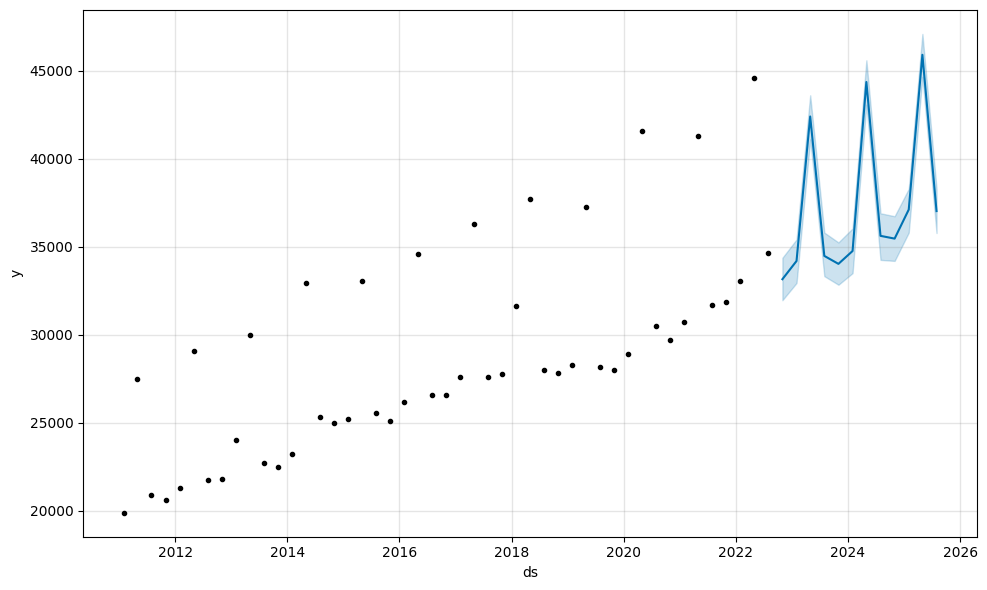

In [8]:
fig=m.plot(pred)
fig.show()

In [11]:
mae=mean_squared_error(test_df['y'],pred['yhat'])
print(f"Mean Squared Error: {mae}")

Mean Squared Error: 3327430.0025790534


Base Model: Mean Absolute Error: 1546.9262046882286